In [282]:
import numpy as np
import requests
import pandas as pd
import json
import datetime
from datetime import datetime
import matplotlib 
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [283]:
def API_pull():
    interval = 0
    symbol = "BTC"
    url = f"https://open-api.coinglass.com/api/pro/v1/futures/funding_rates_chart?symbol={symbol}&type=C"
    params = {}
    headers = {
    'coinglassSecret': '7402736635824a8386573385c5dd1be1'
    }
    response = requests.request("GET", url, headers=headers, data = params)
    json_data = json.loads(response.text)

    timestamps = json_data["data"]["dateList"]

    updatedTimes = []
    for d in timestamps:
        updatedT = d/1000
        updatedT = to_date(updatedT)
        updatedTimes.append(updatedT)


    BitmexFunding = json_data["data"]["dataMap"]["Bitmex"]
    BinanceFunding = json_data["data"]["dataMap"]["Binance"]
    OkexFunding = json_data["data"]["dataMap"]["Okex"]

    #aggregate and find average funding rate of top 3 exchanges
    a = 0
    b = 0
    avgfunding = []
    for x in BitmexFunding:
        avg = (x + BinanceFunding[a] + OkexFunding[b])/3
        a = a+1
        b = b+1
        avgfunding.append(avg)


    prices = json_data["data"]["priceList"]
    res = zip(BitmexFunding, BinanceFunding, OkexFunding)
    df = pd.DataFrame({"Price" : prices,
                    "Bitmex" : BitmexFunding,
                    "Binance" : BinanceFunding,
                    "Okex" : OkexFunding,
                    "Avg" : avgfunding })

    df.index = updatedTimes

    return df

In [284]:
API_pull()

,Price,Bitmex,Binance,Okex,Avg
01/08/2022,41681.5,0.0100,0.010000,0.008000,0.009333
01/09/2022,41800.1,-0.0202,0.001830,-0.009000,-0.009123
01/09/2022,41630.6,-0.0134,0.010000,0.011000,0.002533
01/09/2022,41835.4,-0.0527,-0.005297,-0.024000,-0.027332
01/10/2022,42039.8,-0.0001,-0.006584,-0.002000,-0.002895
...,...,...,...,...,...
07/06/2022,20529.8,0.0100,0.006642,0.003860,0.006834
07/07/2022,20413.4,0.0100,0.003444,0.000394,0.004613
07/07/2022,20859.8,0.0100,0.000707,0.010726,0.007144
07/07/2022,21622.6,0.0100,-0.005995,-0.025170,-0.007055


In [249]:
interval = 0
symbol = "ETH"
url = f"https://open-api.coinglass.com/api/pro/v1/futures/funding_rates_chart?symbol={symbol}&type=C"
params = {}
headers = {
  'coinglassSecret': '7402736635824a8386573385c5dd1be1'
}
response = requests.request("GET", url, headers=headers, data = params)
#response = response.text.encode('utf8')
json_data = json.loads(response.text)
json_data

{'code': '0',
 'msg': 'success',
 'data': {'dateList': [1641600000000,
   1641628800000,
   1641657600000,
   1641686400000,
   1641715200000,
   1641744000000,
   1641772800000,
   1641801600000,
   1641830400000,
   1641859200000,
   1641888000000,
   1641916800000,
   1641945600000,
   1641974400000,
   1642003200000,
   1642032000000,
   1642060800000,
   1642089600000,
   1642118400000,
   1642147200000,
   1642176000000,
   1642204800000,
   1642233600000,
   1642262400000,
   1642320000000,
   1642348800000,
   1642377600000,
   1642406400000,
   1642435200000,
   1642464000000,
   1642492800000,
   1642521600000,
   1642550400000,
   1642579200000,
   1642608000000,
   1642636800000,
   1642665600000,
   1642694400000,
   1642723200000,
   1642752000000,
   1642780800000,
   1642809600000,
   1642838400000,
   1642867200000,
   1642896000000,
   1642924800000,
   1642953600000,
   1642982400000,
   1643011200000,
   1643040000000,
   1643068800000,
   1643097600000,
   16431264

In [250]:
timestamps = json_data["data"]["dateList"]

In [251]:
updatedTimes = []

In [252]:
for d in timestamps:
    updatedT = d/1000
    updatedT = to_date(updatedT)
    updatedTimes.append(updatedT)
    

In [253]:
BitmexFunding = json_data["data"]["dataMap"]["Bitmex"]
BinanceFunding = json_data["data"]["dataMap"]["Binance"]
OkexFunding = json_data["data"]["dataMap"]["Okex"]

In [254]:
#aggregate and find average funding rate of top 3 exchanges
a = 0
b = 0
avgfunding = []
for x in BitmexFunding:
    avg = (x + BinanceFunding[a] + OkexFunding[b])/3
    a = a+1
    b = b+1
    avgfunding.append(avg)

In [255]:
updatedTimes

['01/07/2022',
 '01/08/2022',
 '01/08/2022',
 '01/08/2022',
 '01/09/2022',
 '01/09/2022',
 '01/09/2022',
 '01/10/2022',
 '01/10/2022',
 '01/10/2022',
 '01/11/2022',
 '01/11/2022',
 '01/11/2022',
 '01/12/2022',
 '01/12/2022',
 '01/12/2022',
 '01/13/2022',
 '01/13/2022',
 '01/13/2022',
 '01/14/2022',
 '01/14/2022',
 '01/14/2022',
 '01/15/2022',
 '01/15/2022',
 '01/16/2022',
 '01/16/2022',
 '01/16/2022',
 '01/17/2022',
 '01/17/2022',
 '01/17/2022',
 '01/18/2022',
 '01/18/2022',
 '01/18/2022',
 '01/19/2022',
 '01/19/2022',
 '01/19/2022',
 '01/20/2022',
 '01/20/2022',
 '01/20/2022',
 '01/21/2022',
 '01/21/2022',
 '01/21/2022',
 '01/22/2022',
 '01/22/2022',
 '01/22/2022',
 '01/23/2022',
 '01/23/2022',
 '01/23/2022',
 '01/24/2022',
 '01/24/2022',
 '01/24/2022',
 '01/25/2022',
 '01/25/2022',
 '01/25/2022',
 '01/26/2022',
 '01/26/2022',
 '01/26/2022',
 '01/27/2022',
 '01/27/2022',
 '01/27/2022',
 '01/28/2022',
 '01/28/2022',
 '01/28/2022',
 '01/29/2022',
 '01/29/2022',
 '01/29/2022',
 '01/30/20

In [256]:
prices = json_data["data"]["priceList"]

In [257]:
res = zip(BitmexFunding, BinanceFunding, OkexFunding)

In [258]:
df = pd.DataFrame({"Price" : prices,
                   "Bitmex" : BitmexFunding,
                   "Binance" : BinanceFunding,
                   "Okex" : OkexFunding,
                    "Avg" : avgfunding })

In [259]:
df

,Price,Bitmex,Binance,Okex,Avg
0,3193.34,0.0406,-0.000482,-0.012000,0.009373
1,3214.80,0.0123,-0.005095,-0.013000,-0.001932
2,3157.89,0.0445,0.000881,-0.004000,0.013794
3,3078.84,0.0520,-0.000332,-0.008000,0.014556
4,3128.50,0.0144,-0.016370,-0.027000,-0.009657
...,...,...,...,...,...
538,1131.68,0.0795,-0.001512,-0.003461,0.024842
539,1184.82,0.1104,0.007337,-0.002018,0.038573
540,1175.12,0.1060,0.007111,0.009890,0.041000
541,1218.02,0.0705,-0.006054,-0.012715,0.017244


In [15]:
# Convert the dates to timestamps
def to_timestamp(dateString):
    #element = datetime.strptime(dateString, '%m/%d/%Y')
    element = date.strftime(dateString, '%Y/%m/%d')
    element = datetime.strptime(element, '%Y/%m/%d')
    return int(datetime.timestamp(element))

# Will be used later to convert back
def to_date(timestamp):
    dt = datetime.fromtimestamp(timestamp)
    return dt.strftime('%m/%d/%Y')

def to_backward_date(dateString):
    element = date.strftime(dateString, '%Y/%m/%d')
    element = datetime.strptime(dateString, '%m/%d/%Y')
    return datetime.strftime(element, "%Y-%m-%d")

In [260]:
df.index = updatedTimes

In [261]:
df

,Price,Bitmex,Binance,Okex,Avg
01/07/2022,3193.34,0.0406,-0.000482,-0.012000,0.009373
01/08/2022,3214.80,0.0123,-0.005095,-0.013000,-0.001932
01/08/2022,3157.89,0.0445,0.000881,-0.004000,0.013794
01/08/2022,3078.84,0.0520,-0.000332,-0.008000,0.014556
01/09/2022,3128.50,0.0144,-0.016370,-0.027000,-0.009657
...,...,...,...,...,...
07/06/2022,1131.68,0.0795,-0.001512,-0.003461,0.024842
07/06/2022,1184.82,0.1104,0.007337,-0.002018,0.038573
07/07/2022,1175.12,0.1060,0.007111,0.009890,0.041000
07/07/2022,1218.02,0.0705,-0.006054,-0.012715,0.017244


Text(0, 0.5, 'perp funding rate')

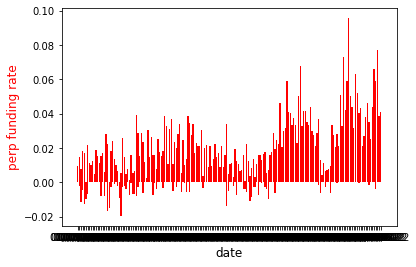

In [262]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.bar(updatedTimes,
        avgfunding,
        color="red")
# set x-axis label
ax.set_xlabel("date", fontsize = 12)
# set y-axis label
ax.set_ylabel("perp funding rate",
              color="red",
              fontsize=12)

TypeError: object of type 'float' has no len()

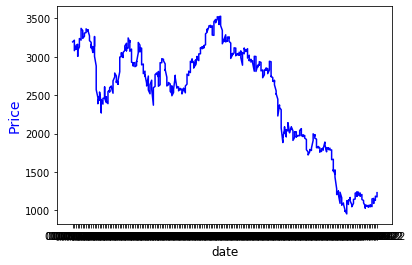

In [263]:
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
fig,ax2 = plt.subplots()
ax2.plot(updatedTimes, prices,color="blue")
ax2.set_xlabel("date", fontsize = 12)
ax2.set_ylabel("Price",color="blue",fontsize=14)
ax2.set_xticks(.1)
#plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
         #   format='jpeg',
       #     dpi=100,
       #     bbox_inches='tight')

In [264]:
plt.show()

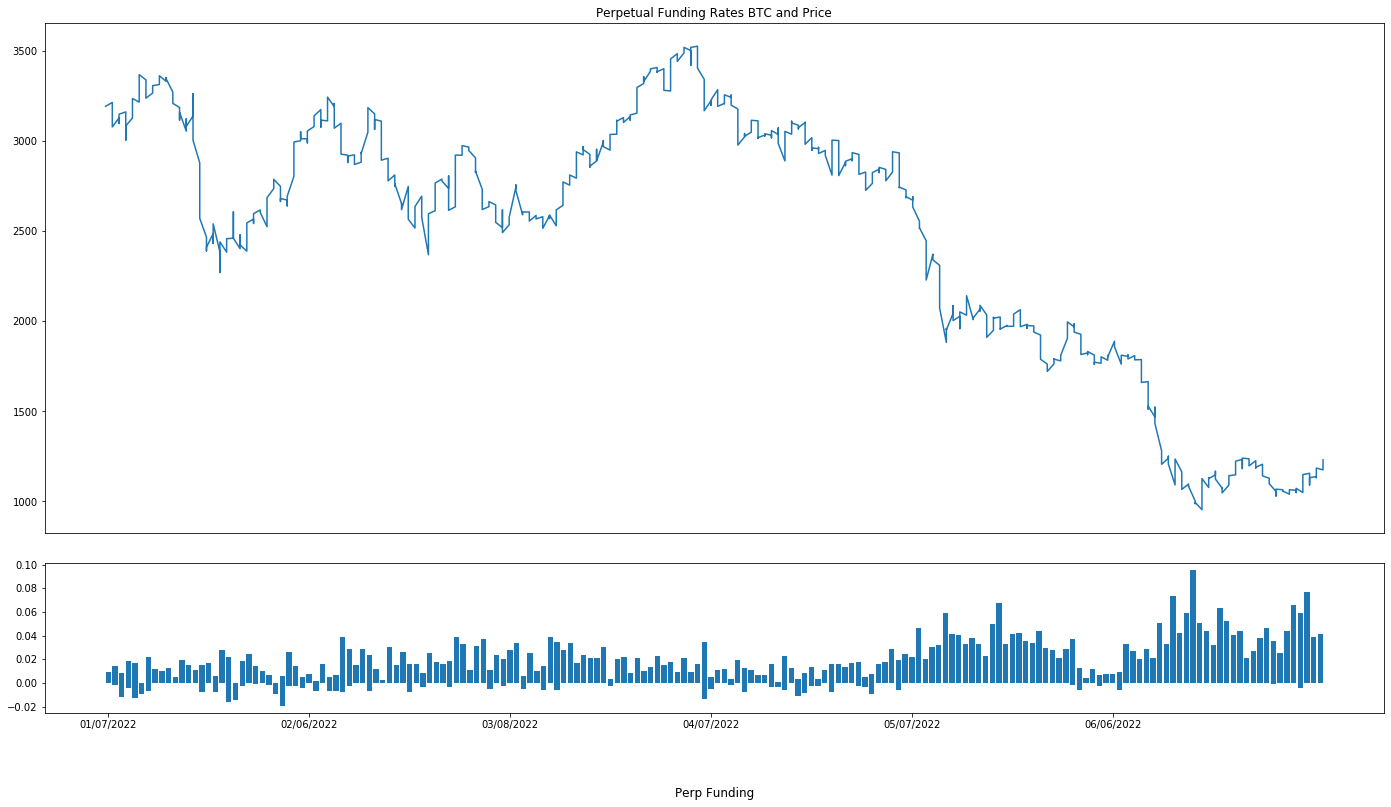

In [265]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(updatedTimes, prices)
plt.title('Perpetual Funding Rates BTC and Price')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(updatedTimes, avgfunding)
top_plt.set_xticks([])
bottom_plt.set_xticks([0,30,60,90,120,150])
#bottom_plt.xticks(rotation=45)
plt.title('Perp Funding', y=-0.60)
plt.gcf().set_size_inches(24,16)

In [266]:
fig2 = px.line(df, x = df.index, y ="Price")

In [267]:
fig2

In [268]:
fig2 = px.bar(df, x = df.index, y ="Avg")
fig2

In [269]:
fig3 = px.scatter(df, x="Price", y = "Avg", trendline="ols")
fig3

In [270]:
#box plots for large deviations in perp funding and how it affects price movement

fig4 = px.box(df, y ="Avg", points="all")
fig4

In [271]:
q1 = np.quantile(df["Avg"], .25)

In [272]:
q1

0.003738085

In [273]:
q3 = np.quantile(df["Avg"], .75)
q3

0.02131588833333333

In [274]:
aboveIQR = 0
belowIQR = 0
for x in df["Avg"]:
    if x > q3:
        aboveIQR = aboveIQR +1
    if x < q1:
        belowIQR = belowIQR +1

print(f'total above ={aboveIQR}')
print(f'total below ={belowIQR}')      

total above =136
total below =136


In [239]:
# if funding rate is negative we should expect to see an increase in price, conversly, if the funding rate is positive 
# we should see a decrease in price

In [275]:

#iterate through df and look forward at price when the funding rate is above or below IQR. Analyze price and record metrics

dates = []
prices = []
fundingrate = []
pct_change = []

row_counter = 6            #EDIT THIS WHEN ADJUSTING FORWARD LOOKING PRICE RANGE +1 = 8hrs, +2 = 16hrs, +3 = 24hrs, etc.
row_length = len(df.index)
for i,j in df.iterrows():
    
    if j[4] > q3:
        print(f'DATE: {i}')
        dates.append(i)
        
        print(f'PRICE: {j[0]}')
        prices.append(j[0])
        
        print(f'FUNDING RATE: {j[4]}')
        fundingrate.append(j[4])
        
        print('Above upper Quartile Event')
        print(" ")
        
        # calculate the proceeding move in price (each row is 8 hours)
        pct_1 = round((df.iloc[row_counter, 0] / j[0]) - 1,3) *100
        print(f'{symbol} saw a {pct_1}% change in price')
        pct_change.append(pct_1)
        
        print("  ")
        print("----------------------------------------")
        print("  ")
        
    if j[4] < q1:
        print(f'DATE:{i}')
        dates.append(i)
        
        print(f'PRICE: {j[0]}')
        prices.append(j[0])
        
        print(f'FUNDING RATE: {j[4]}')
        fundingrate.append(j[4])
        
        print('Below Lower Quartile Event')
        print(" ")
        
        pct_2 = round((df.iloc[row_counter, 0] / j[0]) - 1,3) * 100
        print(f'{symbol} saw a {pct_2}% change in price')
        pct_change.append(pct_2)
        
        print("  ")
        print("----------------------------------------")
        print("  ")
        
    row_counter = row_counter +1
    if row_counter >= row_length:
        break

DATE:01/08/2022
PRICE: 3214.8
FUNDING RATE: -0.0019316666666666664
Below Lower Quartile Event
 
ETH saw a -1.6% change in price
  
----------------------------------------
  
DATE:01/09/2022
PRICE: 3128.5
FUNDING RATE: -0.009656666666666666
Below Lower Quartile Event
 
ETH saw a 0.0% change in price
  
----------------------------------------
  
DATE:01/09/2022
PRICE: 3149.36
FUNDING RATE: -0.011495333333333335
Below Lower Quartile Event
 
ETH saw a 2.8000000000000003% change in price
  
----------------------------------------
  
DATE:01/10/2022
PRICE: 3162.28
FUNDING RATE: 0.0012766666666666664
Below Lower Quartile Event
 
ETH saw a 1.7000000000000002% change in price
  
----------------------------------------
  
DATE:01/10/2022
PRICE: 3005.4
FUNDING RATE: -0.004173666666666667
Below Lower Quartile Event
 
ETH saw a 11.899999999999999% change in price
  
----------------------------------------
  
DATE:01/11/2022
PRICE: 3236.65
FUNDING RATE: -0.012756666666666666
Below Lower Quartil

Below Lower Quartile Event
 
ETH saw a 8.5% change in price
  
----------------------------------------
  
DATE: 07/04/2022
PRICE: 1110.84
FUNDING RATE: 0.05914466000000001
Above upper Quartile Event
 
ETH saw a 1.9% change in price
  
----------------------------------------
  
DATE: 07/04/2022
PRICE: 1148.82
FUNDING RATE: 0.02777538666666667
Above upper Quartile Event
 
ETH saw a 3.1% change in price
  
----------------------------------------
  
DATE: 07/05/2022
PRICE: 1156.12
FUNDING RATE: 0.02529279
Above upper Quartile Event
 
ETH saw a 1.6% change in price
  
----------------------------------------
  
DATE: 07/05/2022
PRICE: 1131.47
FUNDING RATE: 0.07693668
Above upper Quartile Event
 
ETH saw a 8.799999999999999% change in price
  
----------------------------------------
  


In [276]:
df2 = pd.DataFrame(list(zip(dates, prices, fundingrate, pct_change)), columns =['date', 'price','funding rate', 'change in price']) 

In [277]:
df2

,date,price,funding rate,change in price
0,01/08/2022,3214.80,-0.001932,-1.6
1,01/09/2022,3128.50,-0.009657,0.0
2,01/09/2022,3149.36,-0.011495,2.8
3,01/10/2022,3162.28,0.001277,1.7
4,01/10/2022,3005.40,-0.004174,11.9
...,...,...,...,...
263,07/04/2022,1048.98,-0.003880,8.5
264,07/04/2022,1110.84,0.059145,1.9
265,07/04/2022,1148.82,0.027775,3.1
266,07/05/2022,1156.12,0.025293,1.6


In [278]:
trading_results = 0
list_results = []
cumulative_list_results = []
date_list = []
Bad_trades = 0
Good_trades = 0
total_trades = len(list_results)

for i, k in df2.iterrows():
    if k[2] > 0 and k[3] < 0:
        trading_results = trading_results - (k[3])
        cumulative_list_results.append(trading_results)
        print('nice trade')
        Good_trades = Good_trades + 1
        print(f'Trade Date {k[0]}')
        result = k[3] * -1
        list_results.append(result)
        date_list.append(k[0])
        print(f'+ {result} %')
        print(f' RUNNING TOTAL: {trading_results}%')
        print("   ")
           
            
    if k[2] < 0 and k[3] > 0:
        trading_results = trading_results + (k[3])
        cumulative_list_results.append(trading_results)
        print('nice trade')
        Good_trades = Good_trades + 1
        print(f'Trade Date {k[0]}')
        result = k[3]
        list_results.append(result)
        date_list.append(k[0])
        print(f'+ {result} %')
        print(f' RUNNING TOTAL: {trading_results}%')
        print("   ")
             
            
    if k[2] > 0 and k[3] > 0:
        trading_results = trading_results - k[3]
        cumulative_list_results.append(trading_results)
        print('bad trade')
        Bad_trades = Bad_trades +1
        print(f'Trade Date {k[0]}')
        result = k[3] * -1
        list_results.append(result)
        date_list.append(k[0])
        print(f' {result} %')
        print(f' RUNNING TOTAL: {trading_results}%')
        print("   ")
        
        
    if k[2] < 0 and k[3] < 0:
        trading_results = trading_results + k[3]
        cumulative_list_results.append(trading_results)
        print('bad trade')
        Bad_trades = Bad_trades +1
        print(f'Trade Date {k[0]}')
        result = k[3]
        list_results.append(result)
        date_list.append(k[0])
        print(f' {result} %')
        print(f' RUNNING TOTAL: {trading_results}%')
        print("   ")
              
    print("-------------")
    #print(f' RESULTS: {trading_results} %')

bad trade
Trade Date 01/08/2022
 -1.6 %
 RUNNING TOTAL: -1.6%
   
-------------
-------------
nice trade
Trade Date 01/09/2022
+ 2.8000000000000003 %
 RUNNING TOTAL: 1.2000000000000002%
   
-------------
bad trade
Trade Date 01/10/2022
 -1.7000000000000002 %
 RUNNING TOTAL: -0.5%
   
-------------
nice trade
Trade Date 01/10/2022
+ 11.899999999999999 %
 RUNNING TOTAL: 11.399999999999999%
   
-------------
nice trade
Trade Date 01/11/2022
+ 0.1 %
 RUNNING TOTAL: 11.499999999999998%
   
-------------
nice trade
Trade Date 01/12/2022
+ 1.6 %
 RUNNING TOTAL: 13.099999999999998%
   
-------------
bad trade
Trade Date 01/12/2022
 -2.6 %
 RUNNING TOTAL: 10.499999999999998%
   
-------------
bad trade
Trade Date 01/12/2022
 -1.7999999999999998 %
 RUNNING TOTAL: 8.7%
   
-------------
bad trade
Trade Date 01/13/2022
 -0.8 %
 RUNNING TOTAL: 7.8999999999999995%
   
-------------
bad trade
Trade Date 01/13/2022
 -1.7999999999999998 %
 RUNNING TOTAL: 6.1%
   
-------------
bad trade
Trade Date 01/1

In [279]:
print(f'Good Trades = {Good_trades}')
print(f'Bad Trades = {Bad_trades}')
print(f'Total Trades = {Bad_trades + Good_trades}')
print(f'CUMULATIVE RETURN: {trading_results}%')
print(len(list_results))

Good Trades = 135
Bad Trades = 129
Total Trades = 264
CUMULATIVE RETURN: 121.09999999999992%
264


In [246]:
#fig6 = px.scatter(x= list_results, y = list_results)
#fig6

In [280]:
fig5 = px.line(x = date_list, y = cumulative_list_results)
fig5

In [281]:
fig2

In [ ]:
## HYPOTHESIS -- in periods of high volatility, perp funding rates work better?  --- OR MAYBE IN LOW LIQUIDITY ENVIRONMENTS